 NOMBRE: Francis Bravo 

## Metodo de Bisección

### 1. Método de Bisección para Encontrar Soluciones

Use el método de bisección para encontrar las soluciones precisas (con una tolerancia de $10^{-2}$) de la ecuación de segundo grado:

$$
x^3 - 7x^2 + 14x - 6 = 0
$$

en cada intervalo dado.


In [51]:
def bisection_method(func, X0, XF, tol=1e-5):
    """
    Método de bisección para encontrar una raíz de una función en un intervalo dado.

    Parámetros:
    - func: Función objetivo para la cual se busca la raíz.
    - X0: Extremo inferior del intervalo.
    - XF: Extremo superior del intervalo.
    - tol: Tolerancia para la aproximación de la raíz (por defecto 1e-5).

    Retorna:
    - La raíz aproximada dentro de la tolerancia especificada, o None si no se cumple la condición inicial.
    """
    # Verificar si el intervalo es válido
    if func(X0) * func(XF) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo dado. Verifique los valores de X0 y XF.")

    while abs(XF - X0) >= tol:
        Xm = (X0 + XF) / 2  # Punto medio del intervalo
        f_Xm = func(Xm)

        # Si encontramos la raíz exacta
        if f_Xm == 0.0:
            return round(Xm, 9)

        # Actualizar los límites del intervalo
        if func(X0) * f_Xm < 0:
            XF = Xm
        else:
            X0 = Xm

    # Retornar la raíz aproximada
    return round((X0 + XF) / 2, 9)


In [52]:
F = lambda x: x**3 - 7*x**2 + 14*x - 6


#### a. Intervalo $[0, 1]$

In [53]:
print(f"La raíz en el intervalo [0, 1] es: {bisection_method(F, 0, 1)}")


La raíz en el intervalo [0, 1] es: 0.585788727


#### b. Intervalo $[1, 3.2]$

In [54]:
print(f"La raíz en el intervalo [1, 3.2] es: {bisection_method(F, 1, 3.2)}")


La raíz en el intervalo [1, 3.2] es: 2.999998093


#### c. Intervalo $[3.2,4]$

In [55]:
print(f"La raíz en el intervalo [3.2, 4] es: {bisection_method(F, 3.2, 4)}")


La raíz en el intervalo [3.2, 4] es: 3.414212036


### 4. Representación Gráfica de Funciones

#### a. Dibujar las Gráficas

Dibuje las gráficas de las siguientes funciones en el mismo sistema de coordenadas:

1. $y = x^2 - 1$
2. $y = e^{1 - x^2}$


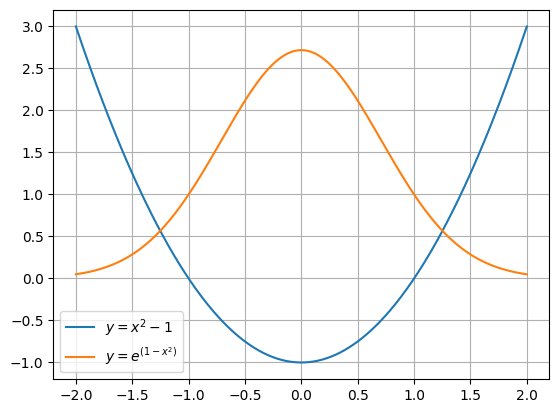

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
plt.plot(x, x**2 - 1, label=r'$y = x^2 - 1$')
plt.plot(x, np.exp(1 - x**2), label=r'$y = e^{(1 - x^2)}$')
plt.legend()
plt.grid()
plt.show()


#### b. Método de Bisección para Aproximación

Use el método de bisección para encontrar una aproximación (con una tolerancia de $10^{-3}$) del valor de $x$ que satisface la ecuación:

$$
x^2 - 1 = e^{1 - x^2}
$$

en el intervalo $[-2, 0]$.


In [57]:
root = bisection_method(lambda x: x**2 - 1 - np.exp(1 - x**2), -2, 0)
print(f"La raíz para la función es: {root}")


La raíz para la función es: -1.251857758


### EJERCICIOS APLICADOS 

### 1. Cálculo del Volumen de Agua en un Abrevadero

Un abrevadero de longitud $L$ tiene una sección transversal en forma de semicírculo con radio $r$ (consulte la figura adjunta). Cuando se llena con agua hasta una distancia $h$ desde la parte superior, el volumen $V$ de agua se calcula como:

$$
V = L \left[ 0.5\pi r^2 - r^2 \arcsin\left(\frac{h}{r}\right) - h \sqrt{r^2 - h^2} \right]
$$

**Nota**: $\arcsin$ representa la función arco seno, y $h \leq r$ para asegurar que la altura del agua esté dentro del semicírculo.


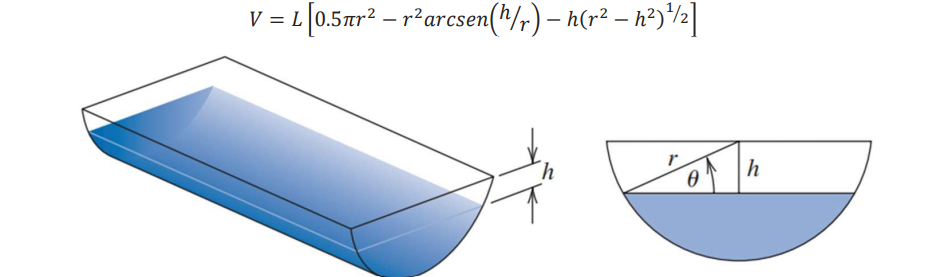

#### Encontrar la Profundidad del Agua

Suponga que el abrevadero tiene las siguientes dimensiones:

- Longitud $L = 10 \, \text{cm}$
- Radio $r = 1 \, \text{cm}$
- Volumen de agua $V = 12.4 \, \text{cc}$

Encuentre la profundidad del agua $h$ en el abrevadero con una precisión de $0.01 \, \text{cm}$.


In [58]:
def V(h):
    return 10 * (0.5 * np.pi - np.arcsin(h) - h * np.sqrt(1 - h**2)) - 12.4

root = bisection_method(V, 0, 1, tol=0.01)
print(f"La profundidad del agua es: {root} cm")


La profundidad del agua es: 0.16796875 cm


### 2. Caída de un Objeto con Resistencia Viscosa

Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa $m$ cae desde una altura $s_0$, y que la altura del objeto después de $t$ segundos está dada por:

$$
s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left( 1 - e^{-kt/m} \right)
$$

donde:

- $g = 9.81 \, \text{m/s}^2$ es la aceleración debido a la gravedad.
- $k$ es el coeficiente de resistencia del aire en $N \cdot s/m$.

Suponga los siguientes valores:

- Altura inicial $s_0 = 300 \, \text{m}$
- Masa del objeto $m = 0.25 \, \text{kg}$
- Coeficiente de resistencia $k = 0.1 \, \text{N} \cdot \text{s/m}$

Encuentre, con una precisión de $0.01$ segundos, el tiempo que tarda el objeto en golpear el suelo.


In [61]:
s0, m, g, k = 300, 0.25, 9.81, 0.1

def s(t):
    return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

root = bisection_method(s, 0, 100, 0.01)
print(f"El tiempo que tarda en golpear el piso es aproximadamente: {root:.9g} segundos")



El tiempo que tarda en golpear el piso es aproximadamente: 14.7247314 segundos


### Ejercicios Teóricos

#### Uso del Teorema 2.1 para Encontrar la Cota de Iteraciones

Use el Teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de la siguiente ecuación:

$$
x^3 - x - 1 = 0
$$

dentro del intervalo $[1, 2]$. 

Luego, encuentre una aproximación de la raíz con este grado de precisión.


In [60]:
a, b = 1, 2
epsilon = 1e-4
n_min = int(np.ceil(np.log2((b - a) / epsilon)))
print(f"Iteraciones mínimas necesarias según el Teorema 2.1: {n_min}")
root = bisection_method(lambda x: x**3 - x - 1, a, b, tol=epsilon)
print(f"La aproximación de la raíz es: {root}")


Iteraciones mínimas necesarias según el Teorema 2.1: 14
La aproximación de la raíz es: 1.324737549



### Link de repositorio de GitHub
https://github.com/Francis1918/DeberesMetodosNumericos.git
